In [4]:
!pip install geopandas

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
sb.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.7 MB/s eta 0:00:00


# Data loading and Sanity Check

In [5]:
url = 'https://raw.githubusercontent.com/Georgetxm/SC1015/main/train_cleaned.csv'
data = pd.read_csv(url)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43685 entries, 0 to 43684
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   43685 non-null  object 
 1   DeliveryPersonID     43685 non-null  object 
 2   DeliveryPersonAge    43685 non-null  int64  
 3   Ratings              43685 non-null  float64
 4   RestaurantLat        43685 non-null  float64
 5   RestaurantLon        43685 non-null  float64
 6   DeliveryLocationLat  43685 non-null  float64
 7   DeliveryLocationLon  43685 non-null  float64
 8   OrderDate            43685 non-null  object 
 9   TimeOrdered          43685 non-null  object 
 10  TimeOrderPickedUp    43685 non-null  object 
 11  WeatherConditions    43594 non-null  object 
 12  RoadTrafficDensity   43685 non-null  object 
 13  VechicleCondition    43685 non-null  int64  
 14  TypeOfOrder          43685 non-null  object 
 15  TypeOfVehicle        43685 non-null 

In [7]:
print("Data dimensions : ", data.shape)

Data dimensions :  (43685, 20)


# Statistics & EDA on numeric columns

## Distribution & Basic Statistics of numeric columns

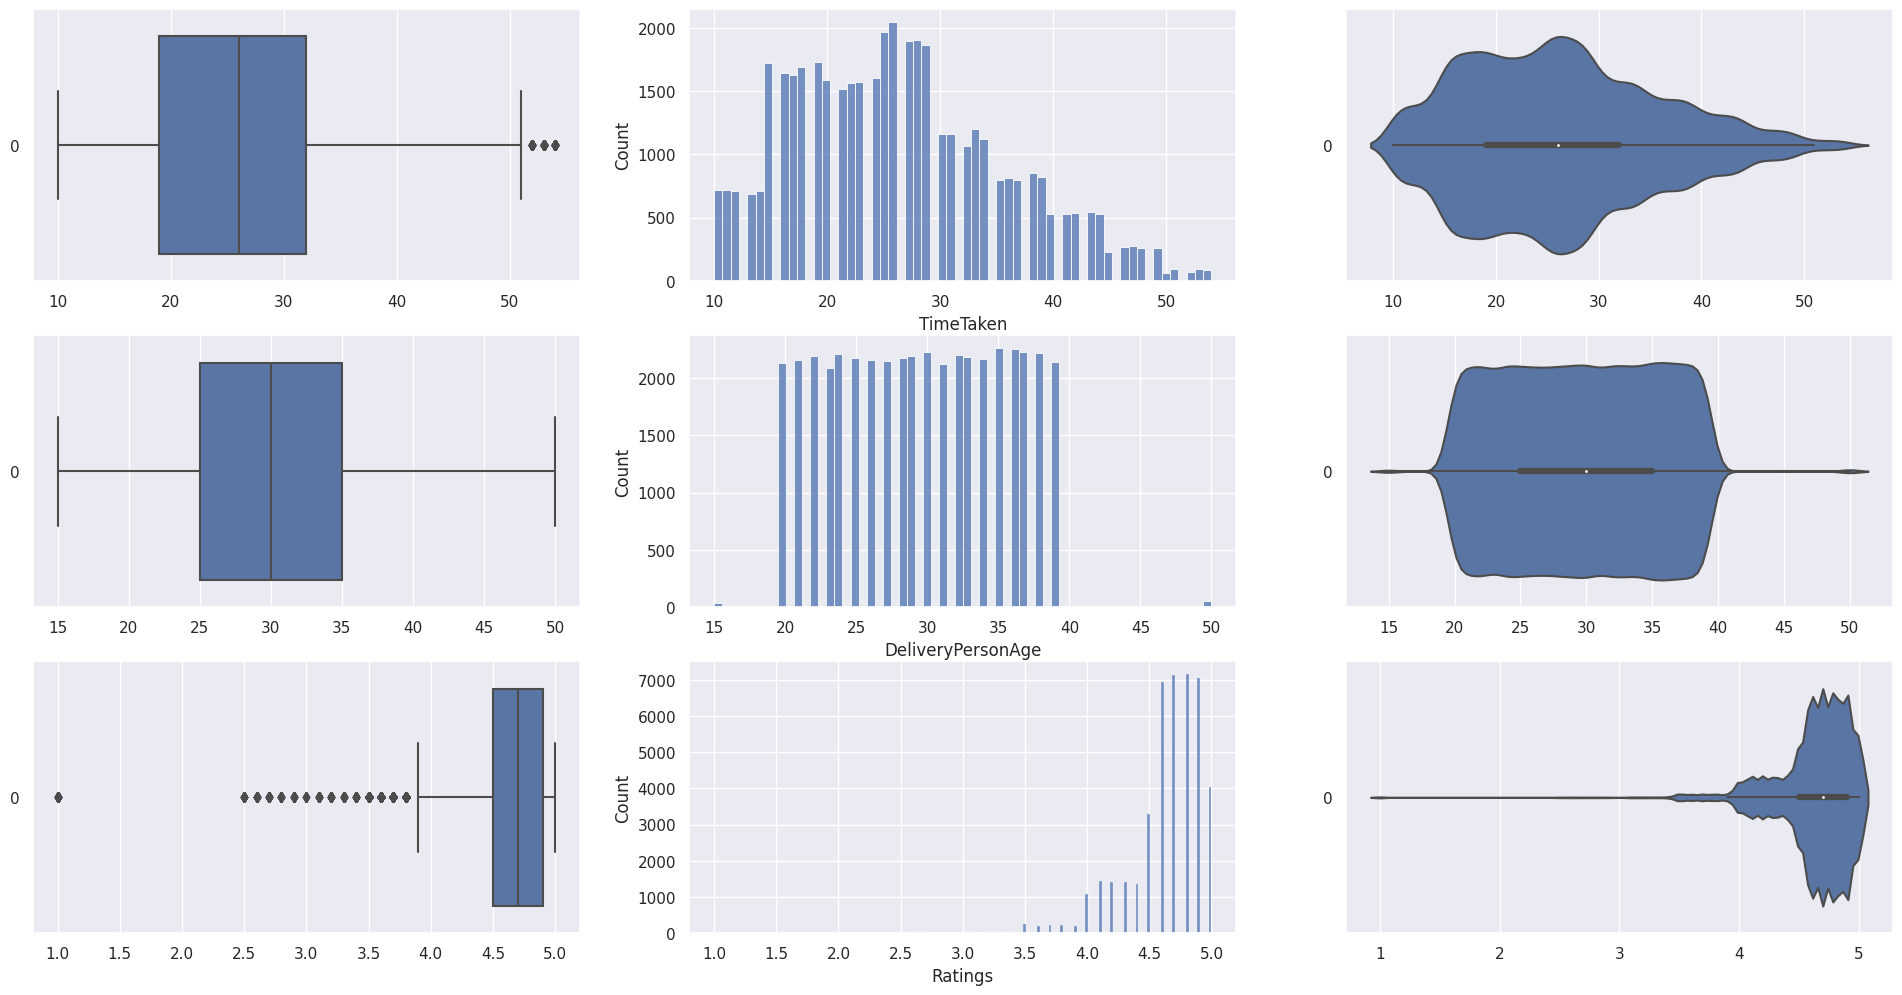

In [ ]:
# Draw the distributions of all variables
numDF = data[["TimeTaken", "DeliveryPersonAge", "Ratings"]]
f, axes = plt.subplots(3, 3, figsize=(24, 12))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

Time taken is positively skewed. This means that there are more deliveries below the mean. </br>
As mentioned in data cleansing the outliers in the age will not be removed as they accurately reflect the data. </br>
Ratings is negatively skewed and has the bulk of it above 3.5.

## Correlation between Response and numeric variables

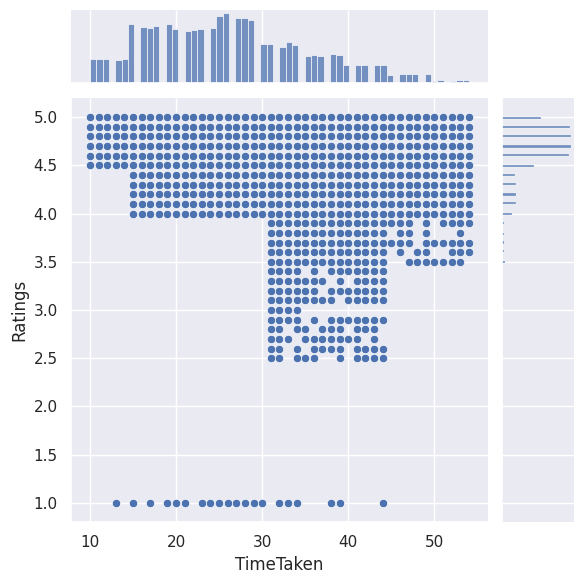

In [ ]:
sb.jointplot(data = data, x = "TimeTaken", y = "Ratings", height = 6)

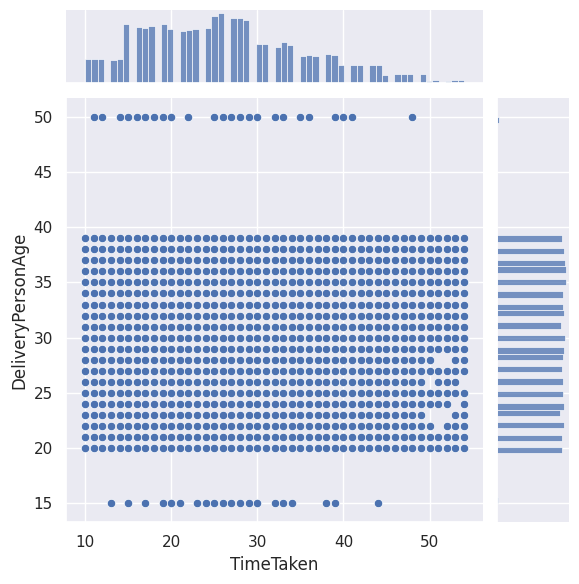

In [ ]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = data, x = "TimeTaken", y = "DeliveryPersonAge", height = 6)

The above joint plots does not show much correlation. Hence, we will use a correlation heatmap to better understand.

                    TimeTaken  DeliveryPersonAge   Ratings  MultipleDeliveries
TimeTaken            1.000000           0.299386 -0.341100            0.379611
DeliveryPersonAge    0.299386           1.000000 -0.081445            0.113476
Ratings             -0.341100          -0.081445  1.000000           -0.115694
MultipleDeliveries   0.379611           0.113476 -0.115694            1.000000


<Axes: >

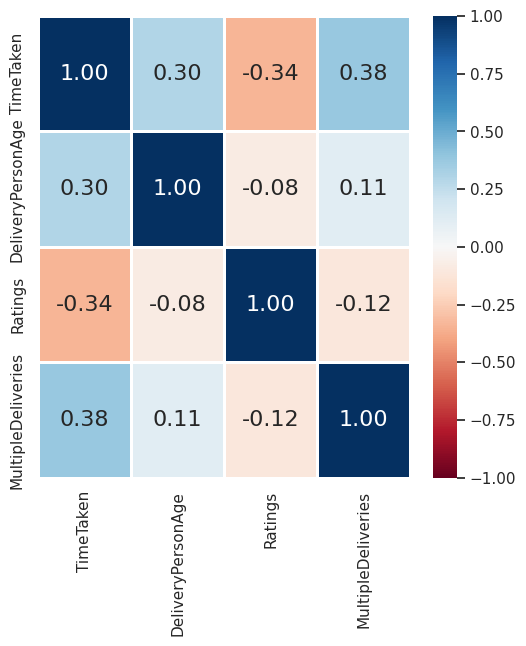

In [ ]:
# Add SalePrice to the dataframe
df = data[["TimeTaken", "DeliveryPersonAge", "Ratings", "MultipleDeliveries"]]

# Correlation Matrix
print(df.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(6, 6))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

### Delivery time correlation with Ratings, Age and Multiple Deliveries
We see that both Age and Ratings have a weak correlation to time taken. Ratings has a negative correlation which is expected as lower delivery time will likely get a higher rating. The positive correlation is surprising as there seems to be some correlation of one's age with the time taken.

## Age and categorical Variables

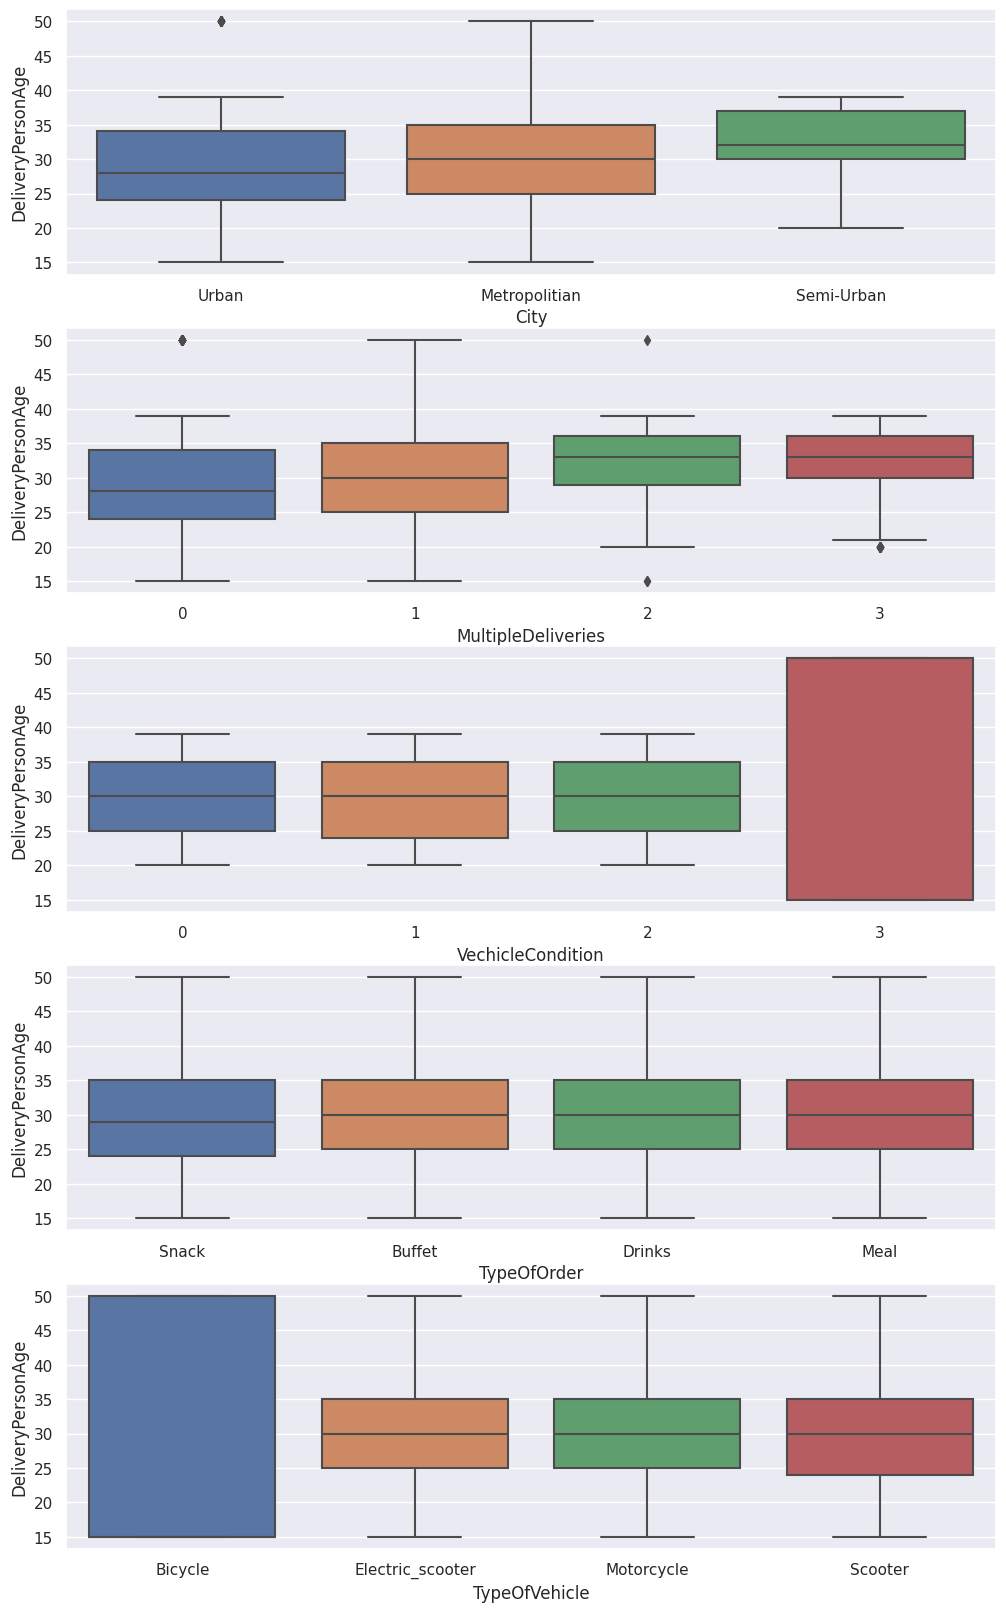

In [9]:
categoricalData = ['City', 'MultipleDeliveries', 'VechicleCondition','TypeOfOrder', "TypeOfVehicle"]
count = 0
f, axes = plt.subplots(5, 1, figsize=(12,20))
for i,x in enumerate(categoricalData):
    order = data.groupby(by=[x])["DeliveryPersonAge"].median().sort_values().index
    sb.boxplot(data=data, x=x, y='DeliveryPersonAge', ax = axes[count], order=order)
    count+=1

plt.show()

### Conclusion on what affects age
Here we observe that the deliveries for semi urban areas tend to be higher as evident by the median, and quartile 1 and 3. The higher age group also tend to do multiple deliveries as seen by the increasing median and quartiles. <br>
Interestingly we also observe that the vehicle conditions and type of vehicle is just a bar for the column 3 and bicycle respectively.

In [ ]:
print(f"Total Data: {len(data.index)}, Bicycle count: {data['TypeOfVehicle'].value_counts()['Bicycle']}, Vehicle Condition 3 count: {data['VechicleCondition'].value_counts()[3]}")


Nothing significant, the bars are likely due to the little data points compared to the other columns.

## Ratings and Categorical Variables

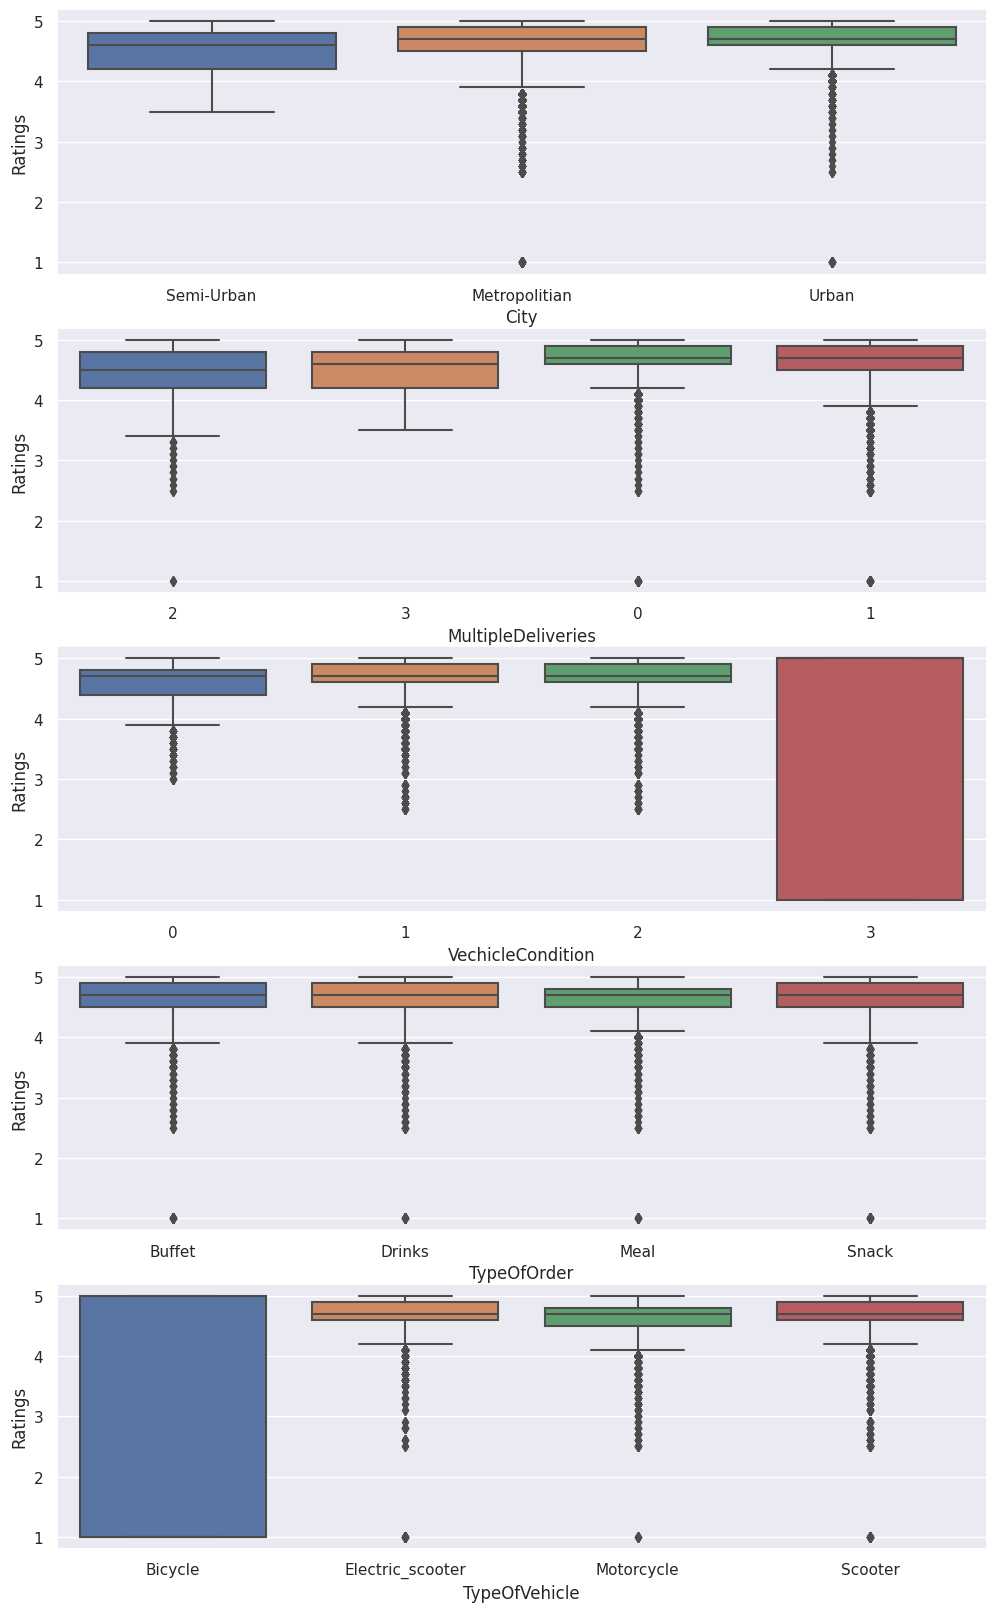

In [ ]:
count = 0
f, axes = plt.subplots(5, 1, figsize=(12,20))
for i,x in enumerate(categoricalData):
    order = data.groupby(by=[x])["Ratings"].median().sort_values().index
    sb.boxplot(data=data, x=x, y='Ratings', ax = axes[count], order=order)
    count+=1

plt.show()

### Conclusion on Rating Biases
Nothing apart from a weak correlation with `Delivery Time` & `Multiple Deliveries` affected `Ratings`. As we can see in the above charts, none of the categorical features have any drastic effects on a deliverer's ratings. Hence, we conclude that there are no biases in the deliverer's ratings.

## Time Taken Distribution and relation with Categorical variables 

In [ ]:
catDF = pd.DataFrame(data[['WeatherConditions', 'RoadTrafficDensity','VechicleCondition', 'TypeOfOrder', 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City']])

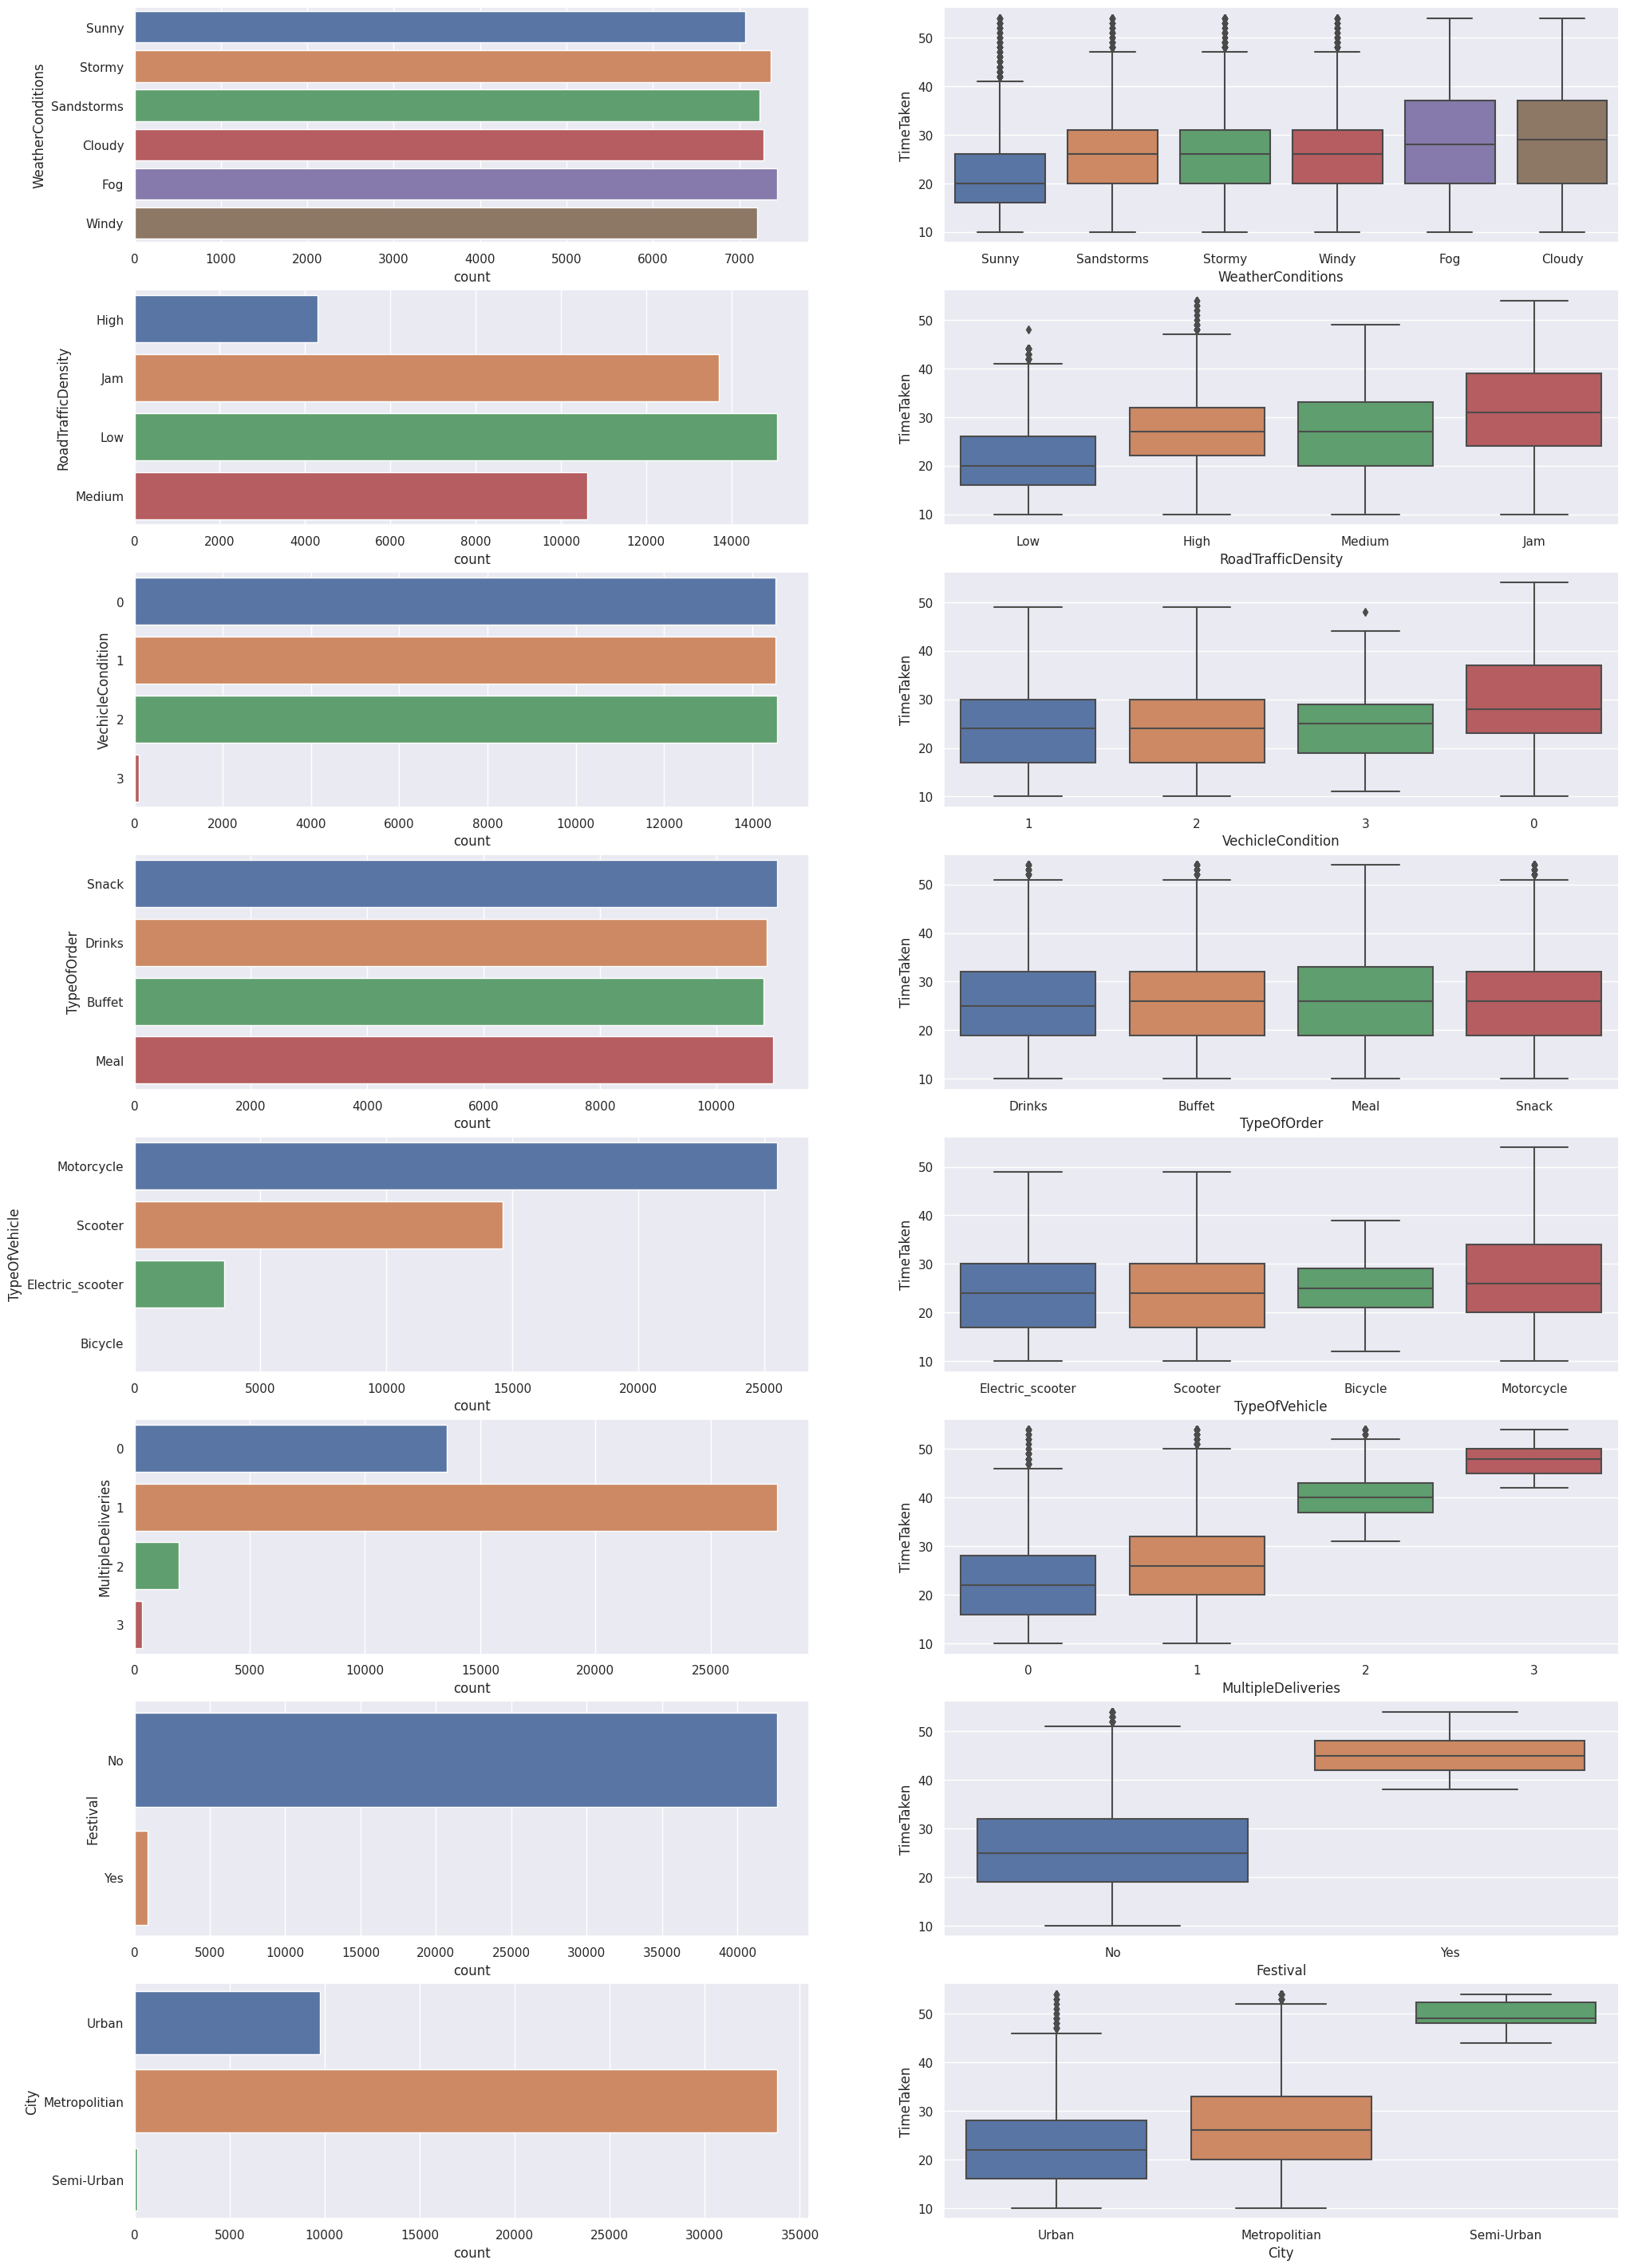

In [ ]:
categoricalData = ['WeatherConditions', 'RoadTrafficDensity','VechicleCondition', 'TypeOfOrder', 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City']
f, axes = plt.subplots(8,2, figsize=(24, 36))

count = 0 
for var in catDF:
    order = data.groupby(by=[categoricalData[count]])["TimeTaken"].median().sort_values().index
    sb.countplot(y = var, data=catDF, ax= axes[count, 0], orient="h")
    sb.boxplot(data=data, x=categoricalData[count], y='TimeTaken', ax = axes[count ,1], order=order)
    count+=1

### What affects Delivery Time
It can be observed that for sunny days, the time taken is below the lot 

1.   Weather


> It can be observed that for sunny days, the time taken has the lowest distribution, which is to be expected.


2.   Type of Vehicle


> While the team expected for manual vehicle like a bicycle to have a distribution that congregates at the higher end of the time spectrum. We see that the distribution is rather even amongst the vehicles.


3. Traffic Density


> The distribution are as per our expectations.


4. Multiple Deliveries



> As expected, the more deliveries, the greater the time taken.



5. City


> Here we see that semi-urban has the greatest difference from the other categories. It may be the lack of roads/pathways in these areas that lead to the increased time.


In conclusion, beyond just multiple deliveries and ratings from the numeric columns. The city, multiple deliveries, traffic density, type of vehicle and weather affects the time taken and can be used to estimate it.




# Spatial/Map

In [ ]:
fdata = pd.DataFrame(data[['RestaurantLat', 'RestaurantLon', 'DeliveryLocationLat', 'DeliveryLocationLon', 'TimeTaken', 'DeliveryPersonAge', 'VechicleCondition', 'TypeOfVehicle', 'MultipleDeliveries', 'RoadTrafficDensity', 'Ratings']])
fdata.describe()

,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,TimeTaken,DeliveryPersonAge,VechicleCondition,MultipleDeliveries,Ratings
count,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000
mean,17.214543,70.668593,17.458164,70.829376,26.289024,29.567861,1.004738,0.748953,4.632567
std,7.750885,21.459258,7.339296,21.136728,9.369354,5.814436,0.820961,0.567844,0.331560
min,-30.902872,-88.366217,0.010000,0.010000,10.000000,15.000000,0.000000,0.000000,1.000000
25%,12.933298,73.170283,12.985996,73.280000,19.000000,25.000000,0.000000,0.000000,4.500000
50%,18.551440,75.898497,18.633626,76.002574,26.000000,30.000000,1.000000,1.000000,4.700000
75%,22.732225,78.045359,22.785049,78.103162,32.000000,35.000000,2.000000,1.000000,4.900000
max,30.914057,88.433452,31.054057,88.563452,54.000000,50.000000,3.000000,3.000000,5.000000


[Text(0.5, 0, 'Delivery Location Longitude')]

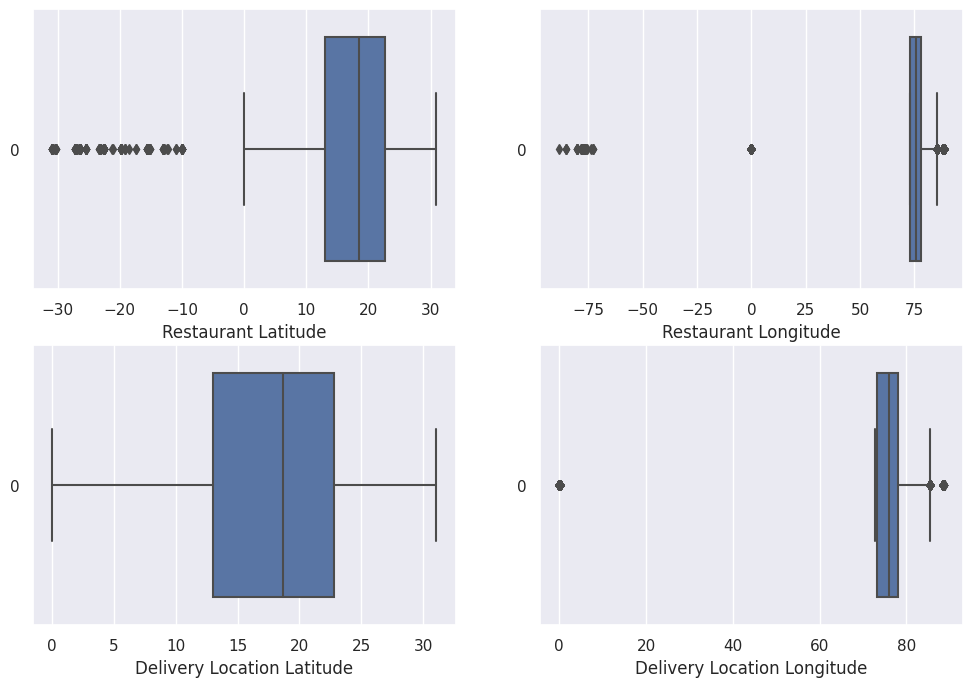

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sb.boxplot(data = fdata['RestaurantLat'], orient = 'h', ax = axes[0,0])
axes[0,0].set(xlabel='Restaurant Latitude')

sb.boxplot(data = fdata['RestaurantLon'], orient = 'h', ax = axes[0,1])
axes[0,1].set(xlabel='Restaurant Longitude')

sb.boxplot(data = fdata['DeliveryLocationLat'], orient = 'h', ax = axes[1,0])
axes[1,0].set(xlabel='Delivery Location Latitude')

sb.boxplot(data = fdata['DeliveryLocationLon'], orient = 'h', ax = axes[1,1])
axes[1,1].set(xlabel='Delivery Location Longitude')

## Dealing with Lat/Lon Outliers

In [ ]:
def count_outliers(df, column_name, threshold=3):
    median = df[column_name].median()
    std = df[column_name].std()
    upper_threshold = median + threshold * std
    lower_threshold = median - threshold * std
    
    num_outliers = len(df[(df[column_name] > upper_threshold) | (df[column_name] < lower_threshold)])
    
    return num_outliers

num_outliers = count_outliers(fdata, 'RestaurantLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant_latitude' column.")
num_outliers = count_outliers(fdata, 'RestaurantLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant_longitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery_location_latitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery_location_longitude' column.")

There are 183 outliers in the 'Restaurant_latitude' column.
There are 3522 outliers in the 'Restaurant_longitude' column.
There are 0 outliers in the 'Delivery_location_latitude' column.
There are 3495 outliers in the 'Delivery_location_longitude' column.


In [ ]:
def absolute(latlong):
    fdata[latlong] = fdata[latlong].abs()

absolute("RestaurantLat")
absolute("RestaurantLon")
absolute("DeliveryLocationLat")
absolute("DeliveryLocationLon")

[Text(0.5, 0, 'Delivery Location Longitude')]

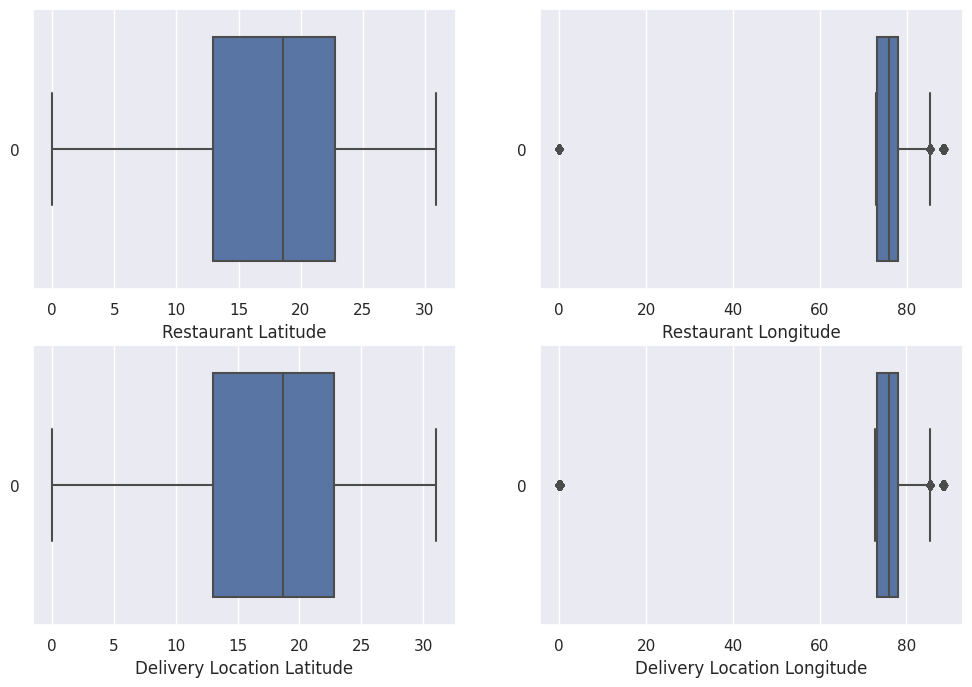

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sb.boxplot(data = fdata['RestaurantLat'], orient = 'h', ax = axes[0,0])
axes[0,0].set(xlabel='Restaurant Latitude')

sb.boxplot(data = fdata['RestaurantLon'], orient = 'h', ax = axes[0,1])
axes[0,1].set(xlabel='Restaurant Longitude')

sb.boxplot(data = fdata['DeliveryLocationLat'], orient = 'h', ax = axes[1,0])
axes[1,0].set(xlabel='Delivery Location Latitude')

sb.boxplot(data = fdata['DeliveryLocationLon'], orient = 'h', ax = axes[1,1])
axes[1,1].set(xlabel='Delivery Location Longitude')

We believe that the negative lat/lon values are technical/entry mistakes as the values do not make sense when placed on a map (in the middle of ocean). Hence, we get the absolute values to replace it as the values are consistent with the geographic range of our data.

In [ ]:
num_outliers = count_outliers(fdata, 'RestaurantLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant Latitude' column.")
num_outliers = count_outliers(fdata, 'RestaurantLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant Longitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery Location Latitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery Location Longitude' column.")

There are 0 outliers in the 'Restaurant Latitude' column.
There are 3495 outliers in the 'Restaurant Longitude' column.
There are 0 outliers in the 'Delivery Location Latitude' column.
There are 3495 outliers in the 'Delivery Location Longitude' column.


In [ ]:
def drop_outliers_iqr(df, iqr_factor):
    # calculate the IQR for each column
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    # create a Boolean mask indicating which rows contain outliers
    outlier_mask = (df < (q1 - iqr_factor * iqr)) | (df > (q3 + iqr_factor * iqr))

    # return the Boolean mask
    return outlier_mask.any(axis=1)

# apply function to identify and drop outliers from column 'A'
iqr_factor = 1 # set IQR factor for outlier detection
# Create a Boolean mask for each column

outlier_mask_RestaurantLat = drop_outliers_iqr(fdata[['RestaurantLat']], iqr_factor)
outlier_mask_RestaurantLon = drop_outliers_iqr(fdata[['RestaurantLon']], iqr_factor)
outlier_mask_DeliveryLocationLat = drop_outliers_iqr(fdata[['DeliveryLocationLat']], iqr_factor)
outlier_mask_DeliveryLocationLon = drop_outliers_iqr(fdata[['DeliveryLocationLon']], iqr_factor)

# Combine the Boolean masks using logical OR
outlier_mask = outlier_mask_RestaurantLat | outlier_mask_RestaurantLon | outlier_mask_DeliveryLocationLat | outlier_mask_DeliveryLocationLon

# Drop the rows containing outliers
fdata = fdata[~outlier_mask]

In [ ]:
num_outliers = count_outliers(fdata, 'RestaurantLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant Latitude' column.")
num_outliers = count_outliers(fdata, 'RestaurantLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Restaurant Longitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLat', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery Location Latitude' column.")
num_outliers = count_outliers(fdata, 'DeliveryLocationLon', threshold=3)
print(f"There are {num_outliers} outliers in the 'Delivery Location Longitude' column.")

There are 0 outliers in the 'Restaurant Latitude' column.
There are 0 outliers in the 'Restaurant Longitude' column.
There are 0 outliers in the 'Delivery Location Latitude' column.
There are 0 outliers in the 'Delivery Location Longitude' column.


[Text(0.5, 0, 'Delivery Location Longitude')]

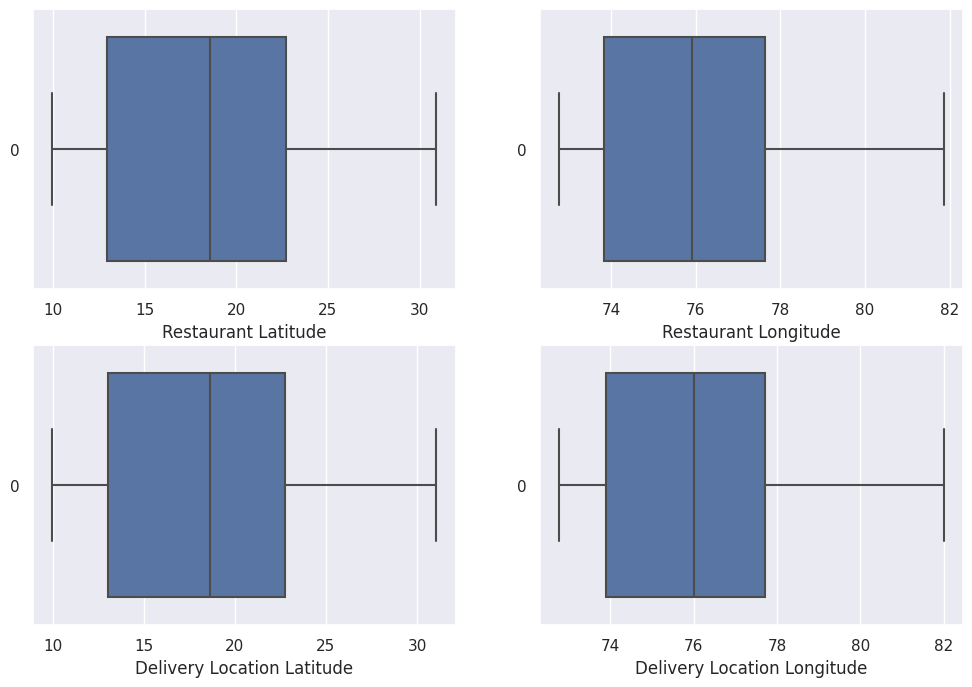

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sb.boxplot(data = fdata['RestaurantLat'], orient = 'h', ax = axes[0,0])
axes[0,0].set(xlabel='Restaurant Latitude')

sb.boxplot(data = fdata['RestaurantLon'], orient = 'h', ax = axes[0,1])
axes[0,1].set(xlabel='Restaurant Longitude')

sb.boxplot(data = fdata['DeliveryLocationLat'], orient = 'h', ax = axes[1,0])
axes[1,0].set(xlabel='Delivery Location Latitude')

sb.boxplot(data = fdata['DeliveryLocationLon'], orient = 'h', ax = axes[1,1])
axes[1,1].set(xlabel='Delivery Location Longitude')

We have decided to drop the values close outside of our IQR range as the are not geographically in India and we cannot think of an accurate/meaningful way to replace the values.

In [ ]:
street_map = gpd.read_file('/content/IND_adm0.shp')

In [ ]:
mapdf = pd.DataFrame(fdata[["RestaurantLat","RestaurantLon"]])

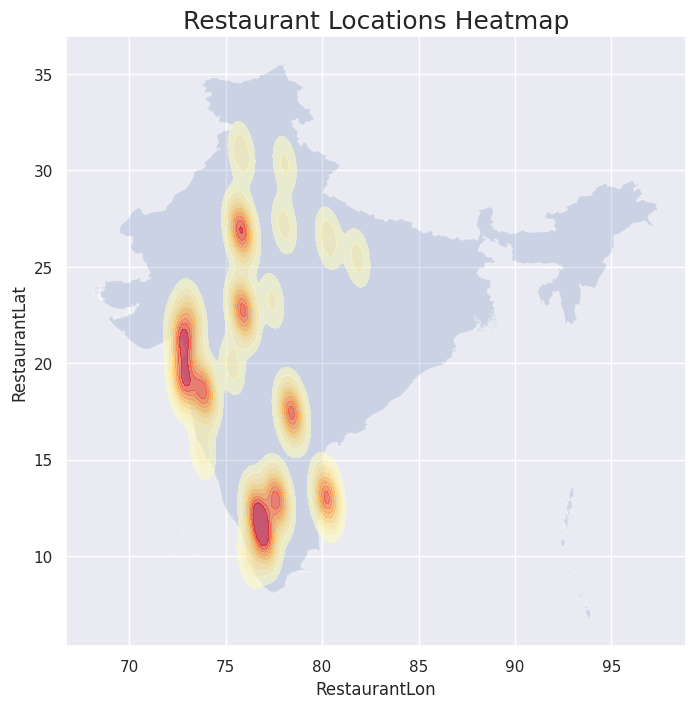

In [ ]:
# Create a heatmap of the restaurant locations on top of the street map
fig, ax = plt.subplots(figsize=(8,8))

# Remove the markers for the restaurant locations from the plot
street_map.plot(ax=ax, alpha=0.2)

# Create a heatmap of the restaurant locations on top of the street map
sb.kdeplot(x=mapdf['RestaurantLon'], y=mapdf['RestaurantLat'], cmap='YlOrRd', alpha=0.6, fill=True, ax=ax)

# Adjust the legend and add a title to the plot
ax.set_title('Restaurant Locations Heatmap', fontsize=18)
ax.legend().remove()

# Display the plot
plt.show()

## Distribution of Orders geographically
Here we wanted to see the distribution of orders in India geographically. It can been seen that South India has more orders recorded if we divide the map into half (23 Lat).

# Feature Engineering - Distance & Speed

In [ ]:
def haversine(lat1, lng1, lat2, lng2):
    """calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)
fdata.loc[:, 'Distance'] = haversine(fdata['RestaurantLat'], fdata['RestaurantLon'], fdata['DeliveryLocationLat'], fdata['DeliveryLocationLon'])

In [ ]:
fdata.describe()

,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,TimeTaken,DeliveryPersonAge,VechicleCondition,MultipleDeliveries,Ratings,Distance
count,37076.000000,37076.000000,37076.000000,37076.000000,37076.000000,37076.000000,37076.000000,37076.00000,37076.000000,37076.000000
mean,18.547661,76.158523,18.611402,76.222264,26.296175,29.551192,1.003938,0.74884,4.630723,9.740414
std,5.546387,2.377764,5.548393,2.378506,9.359010,5.814048,0.820562,0.56700,0.334225,5.611776
min,9.957144,72.768726,9.967144,72.778726,10.000000,15.000000,0.000000,0.00000,1.000000,1.465067
25%,12.978453,73.830327,13.044365,73.898972,19.000000,25.000000,0.000000,0.00000,4.500000,4.657997
50%,18.562450,75.902847,18.644080,76.016959,26.000000,30.000000,1.000000,1.00000,4.700000,9.219906
75%,22.722634,77.643685,22.752634,77.718179,32.000000,35.000000,2.000000,1.00000,4.900000,13.682165
max,30.914057,81.860187,31.054057,82.000187,54.000000,50.000000,3.000000,3.00000,5.000000,20.969489


In [ ]:
tdist = pd.DataFrame(fdata[['TimeTaken', 'Distance', 'RoadTrafficDensity', 'Ratings']])
tdist.describe()

,TimeTaken,Distance,Ratings
count,37076.000000,37076.000000,37076.000000
mean,26.296175,9.740414,4.630723
std,9.359010,5.611776,0.334225
min,10.000000,1.465067,1.000000
25%,19.000000,4.657997,4.500000
50%,26.000000,9.219906,4.700000
75%,32.000000,13.682165,4.900000
max,54.000000,20.969489,5.000000


In [ ]:
print(tdist.corr())

           TimeTaken  Distance   Ratings
TimeTaken   1.000000  0.322501 -0.341636
Distance    0.322501  1.000000 -0.103833
Ratings    -0.341636 -0.103833  1.000000


<ipython-input-19-5dc834c7cd09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tdist.corr())


<ipython-input-20-5e2be5126d54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(tdist.corr(), vmin = -1, vmax = 1, linewidths = 1,


<Axes: >

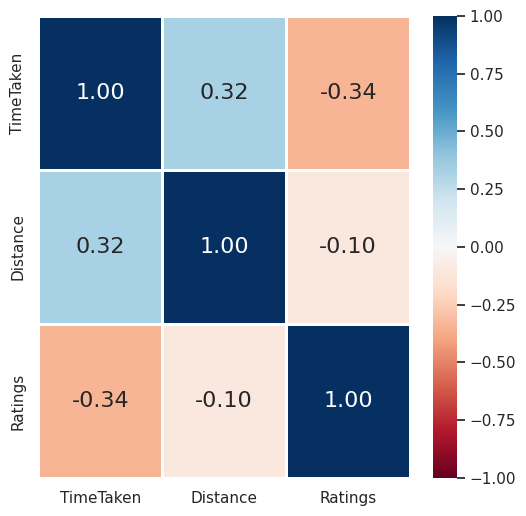

In [ ]:
f = plt.figure(figsize=(6, 6))
sb.heatmap(tdist.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

### Correlation of Distance and other numeric variables
It can be observed that a correlation coefficient of 0.32 suggests that there is some degree of positive association between the two variables, but the relationship is not very strong. Other factors like Weather Conditions and Traffic Density could be influencing the relationship between the two variables as well.

In [ ]:
fig = px.scatter(tdist, x='Distance', y='TimeTaken', color='RoadTrafficDensity')
fig.show()

### Delivery Time & Distance & Traffic Density
It can be observed that the time taken for the food to be delivered is also dependent on the traffic density as well. 

## Analysing Speed 


In [ ]:
speed = pd.DataFrame(fdata[['TimeTaken', 'DeliveryPersonAge', 'VechicleCondition', 'TypeOfVehicle', 'MultipleDeliveries', 'Ratings', 'Distance']])
speed.describe()

,TimeTaken,DeliveryPersonAge,VechicleCondition,MultipleDeliveries,Ratings,Distance
count,37076.000000,37076.000000,37076.000000,37076.00000,37076.000000,37076.000000
mean,26.296175,29.551192,1.003938,0.74884,4.630723,9.740414
std,9.359010,5.814048,0.820562,0.56700,0.334225,5.611776
min,10.000000,15.000000,0.000000,0.00000,1.000000,1.465067
25%,19.000000,25.000000,0.000000,0.00000,4.500000,4.657997
50%,26.000000,30.000000,1.000000,1.00000,4.700000,9.219906
75%,32.000000,35.000000,2.000000,1.00000,4.900000,13.682165
max,54.000000,50.000000,3.000000,3.00000,5.000000,20.969489


In [ ]:
speed['DeliverySpeed'] = speed['Distance'] / (speed['TimeTaken'] / 60)
speed.describe()

,TimeTaken,DeliveryPersonAge,VechicleCondition,MultipleDeliveries,Ratings,Distance,DeliverySpeed
count,37076.000000,37076.000000,37076.000000,37076.00000,37076.000000,37076.000000,37076.000000
mean,26.296175,29.551192,1.003938,0.74884,4.630723,9.740414,23.856432
std,9.359010,5.814048,0.820562,0.56700,0.334225,5.611776,15.832527
min,10.000000,15.000000,0.000000,0.00000,1.000000,1.465067,1.696010
25%,19.000000,25.000000,0.000000,0.00000,4.500000,4.657997,12.535491
50%,26.000000,30.000000,1.000000,1.00000,4.700000,9.219906,20.553600
75%,32.000000,35.000000,2.000000,1.00000,4.900000,13.682165,31.159618
max,54.000000,50.000000,3.000000,3.00000,5.000000,20.969489,125.121922


<Axes: xlabel='VechicleCondition', ylabel='DeliverySpeed'>

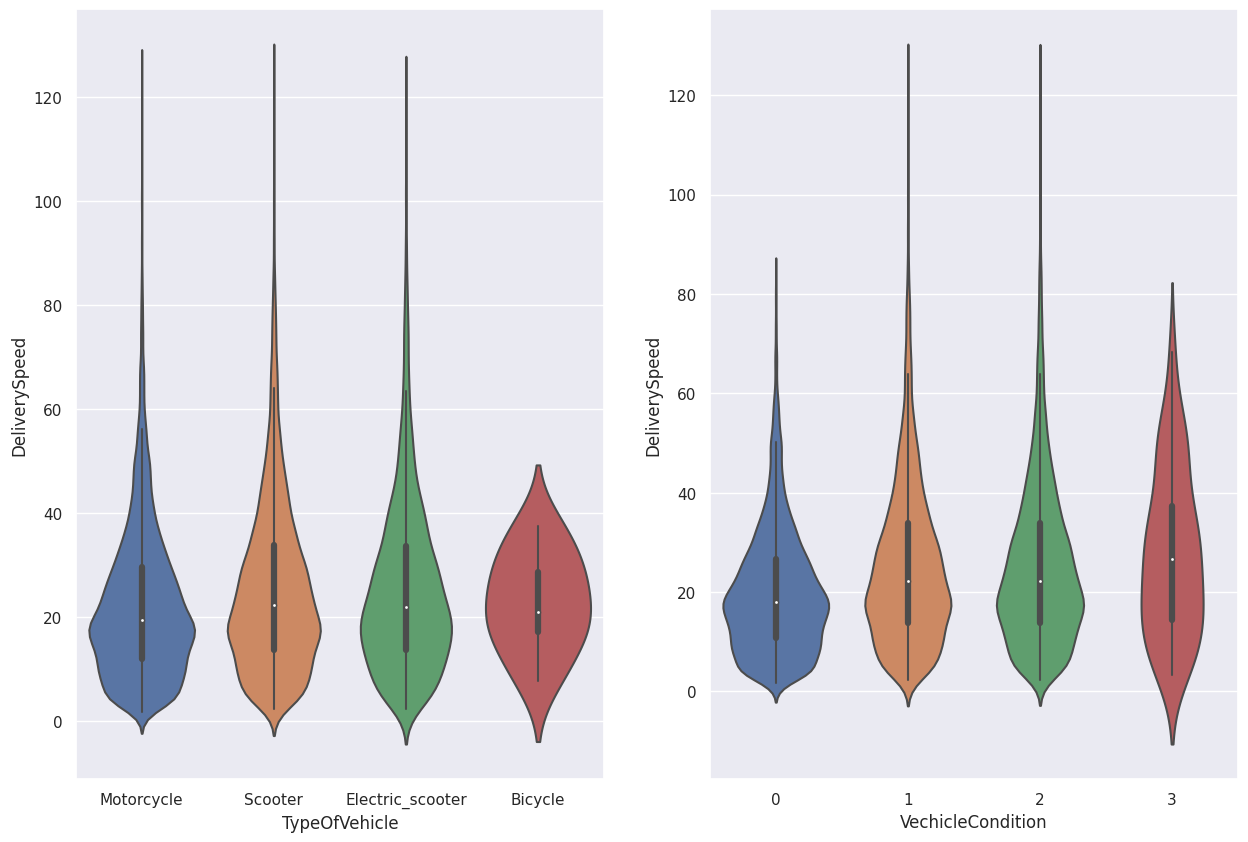

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15, 10))
sb.violinplot(x='TypeOfVehicle', y='DeliverySpeed', data=speed, ax = axes[0])
sb.violinplot(x='VechicleCondition', y='DeliverySpeed', data=speed, ax=axes[1])

### Speed and vehicles
Based on the charts, it can be observed that manual vehicles like bicycles are delivering their orders at a slower pace. Whereas for Motorised Vehicles can deliver their orders faster.

By observing the median, that vehicles that are in better condition can move at a higher speed as compared to vehicle that are in poorer conditions

### Correlation between Speed and Rider's Attributes

<Axes: >

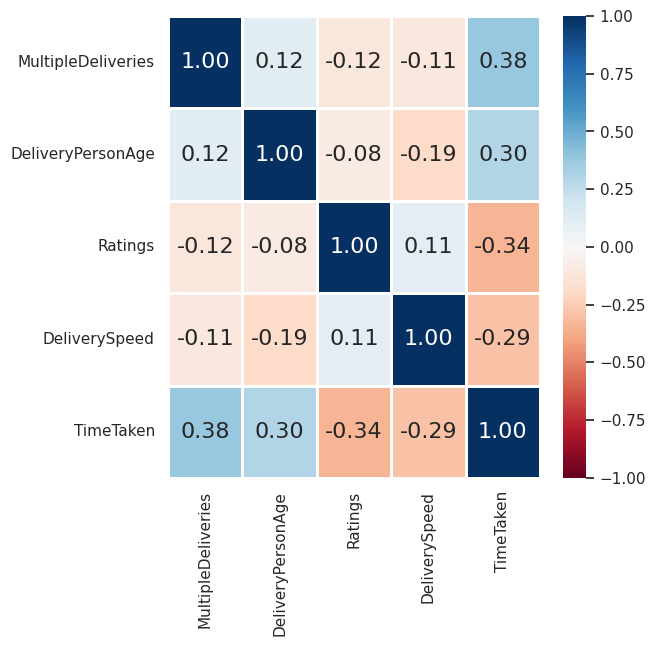

In [ ]:
spage = pd.DataFrame(speed[['MultipleDeliveries','DeliveryPersonAge','Ratings','DeliverySpeed', 'TimeTaken']])

f = plt.figure(figsize=(6, 6))
sb.heatmap(spage.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

The DeliveryPersonAge and the DeliverySpeed have a negative correlation with one another. Given that it is a weak correlation, there is still some degree of correlation that as the DeliveryPersonAge goes up, he/she will deliver their orders at a slower rate. 

MultipleDeliveries and Ratings also have a negative correlation with one another. It could be due to the fact that when the rider accepts MultipleDeliveries, Order Time is delayed, which in turn resulted in lower ratings by customers. 

# EDA on Date, Day, Time

## Average delivery time across the hours in a day

In [10]:
data['TimeOrdered'] = data['TimeOrdered'].replace('NaN ', "12:00:00") # Replacing Nan with mode value (12:00)

In [11]:
data['TimeOrderedHour'] = pd.to_datetime(data['TimeOrdered'])
data['TimeOrderedHour'] = data['TimeOrderedHour'].dt.hour

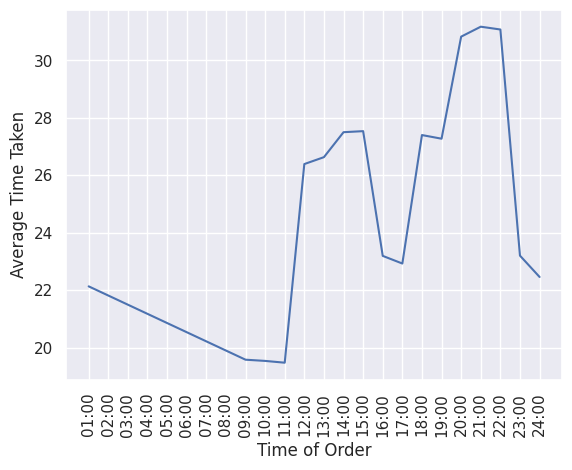

In [30]:
grouped_data =data.groupby('TimeOrderedHour')['TimeTaken'].mean().reset_index()
graph = sb.lineplot(data = grouped_data, x='TimeOrderedHour', y='TimeTaken')
graph.set(xlabel='Time of Order', ylabel='Average Time Taken')
plt.xticks(rotation = 90)
graph.set_xticks(range(0,24))
graph.set_xticklabels(['01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','24:00'])
plt.show()

### Lunch, Dinner and Midnight delivery peaks
We can see that orders during the peak lunch and dinner hours 11:00 to 15:00 and 18:00 to 20:00 respectively has a high average time. We can also see that late night orders after 21:00 have high average time as well.

## Distribution of orders across days of the week

In [13]:
data["OrderDate"] = pd.to_datetime(data['OrderDate'])

<ipython-input-13-39df2960b513>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["OrderDate"] = pd.to_datetime(data['OrderDate'])


In [14]:
data['DayOfWeek'] = data['OrderDate'].dt.day_name()

<ipython-input-28-15ce67dad51b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


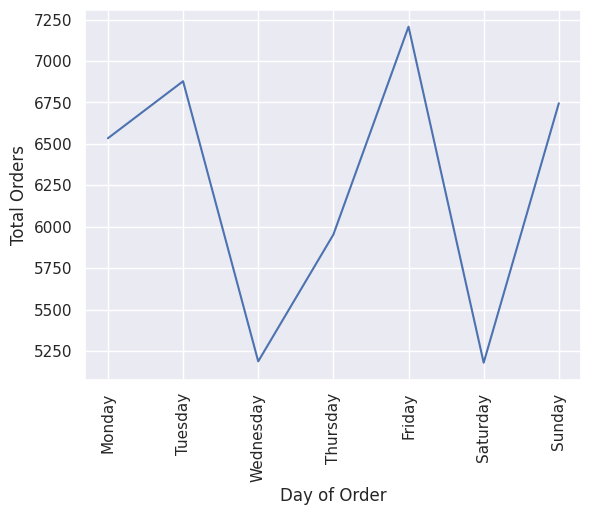

In [28]:
grouped_data = data.groupby(['DayOfWeek'])['DayOfWeek'].count().reset_index(name='Counts')
grouped_data
graph = sb.lineplot(data = grouped_data, x='DayOfWeek', y='Counts')
graph.set(xlabel='Day of Order', ylabel='Total Orders')
plt.xticks(rotation = 90)
graph.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


Here we see that Friday and Sunday have the most orders.

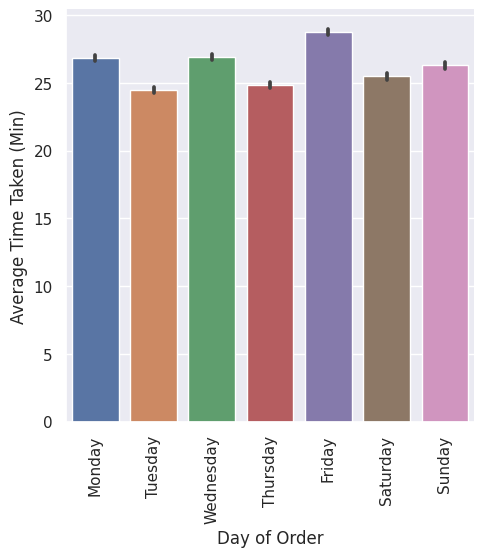

In [15]:
grouped_data =data.groupby('DayOfWeek')['TimeTaken'].mean().reset_index()
graph = sb.catplot(x='DayOfWeek', y='TimeTaken', kind='bar', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
graph.set(xlabel='Day of Order', ylabel='Average Time Taken (Min)')
plt.xticks(rotation = 90)
plt.show()

Nothing significant, only Friday has the longest average time taken.

# Data-Driven Insights & Recommendations
It can be concluded that there are no biases outside of performance metric (Delivery Time Taken & Attending to multiple orders) in determining a deliverer's ratings.

Based on the above EDA, we found out that distance, multiple deliveries and age are positively correlated to delivery time. Categorical factors like low traffic density, urban city deliveries and sunny weather also led to lower delivery times.

Therefore, our recommendations to lower delivery timings are to:


1.  The food delivery algorithm should aim to further minimise delivery `distances`.

2.   The food delivery platform can allow users to “prioritise” their delivery, by paying a greater fee ensure the delivery is for their food only.

3. A user should try to avoid peak lunch and dinner periods to avoid longer deliverie times.


